# Lista 2

In [2]:
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import t

In [4]:
def oblicz_regresje(x, y):
    # Obliczenie współczynnika b1
    b1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
    # Obliczenie współczynnika b0
    b0 = np.mean(y) - b1 * np.mean(x)
    return b0, b1

## zadanie 1

In [5]:
def var_b1(x, v):
    x_mean = np.mean(x)
    return v/(v-2)*1/(sum((xi - x_mean)**2 for xi in x))

In [6]:
def var_b0(x, v):
    x_mean = np.mean(x)
    n = len(x)
    return v/(v-2)*(1/n + x_mean**2 * 1/(sum((xi - x_mean)**2 for xi in x)))

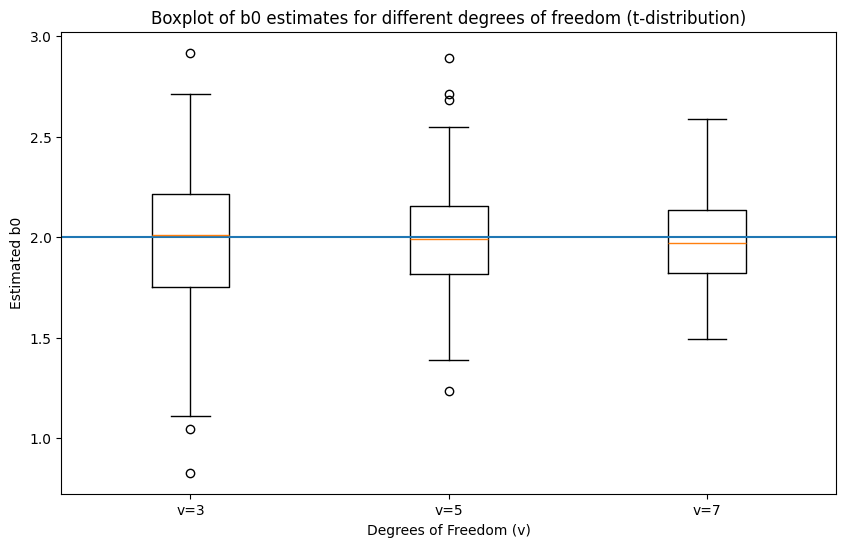

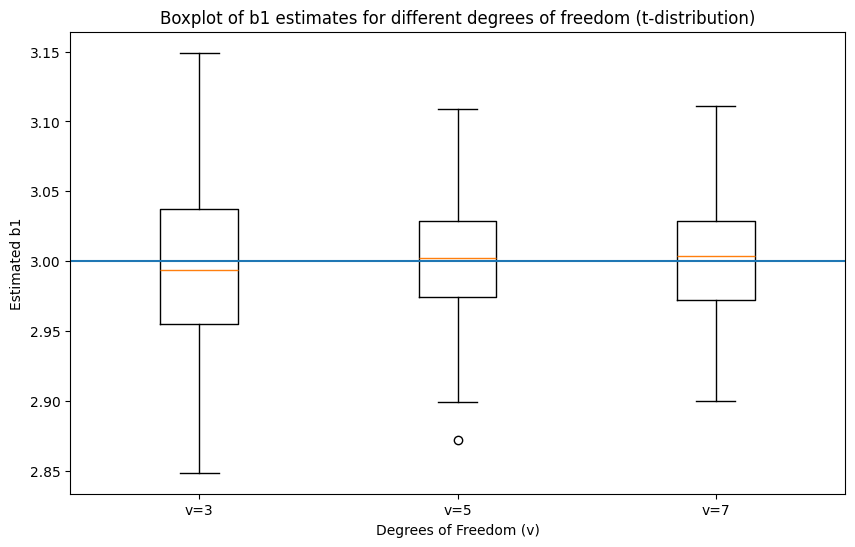

In [12]:
vv = [3, 5, 7] 
sig = [1.0, 3.0, 7.0] 
b0_true = 2.0
b1_true = 3.0
n = 100 
MC = 200

b0s = {}
b1s = {}

for v in vv:
    b0s[v] = [] 
    b1s[v] = []  
    for _ in range(MC):
        x = np.random.uniform(0, 10, n)
        epst = t.rvs(v, size=n)
        y = b0_true + b1_true * x + epst
        b0, b1 = oblicz_regresje(x, y)
        b0s[v].append(b0)
        b1s[v].append(b1)

plt.figure(figsize=(10, 6))
plt.boxplot(b0s.values(), labels=[f'v={v}' for v in vv])
plt.axhline(y = b0_true, label = "b0")
plt.title('Boxplot of b0 estimates for different degrees of freedom (t-distribution)')
plt.xlabel('Degrees of Freedom (v)')
plt.ylabel('Estimated b0')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(b1s.values(), labels=[f'v={v}' for v in vv])
plt.axhline(y = b1_true, label = "b1")
plt.title('Boxplot of b1 estimates for different degrees of freedom (t-distribution)')
plt.xlabel('Degrees of Freedom (v)')
plt.ylabel('Estimated b1')
plt.show()


In [28]:
for v in vv:
    print(f"Stopnie swobody (v={v}):")
    print("    wariancja b0 ze wzoru:", var_b0(y, v))  
    print(f"  Wariancja estymatora b0: {np.var(b0s[v])}")
    print("    wariancja b1 ze wzoru:", var_b1(y, v))
    print(f"  Wariancja estymatora b1: {np.var(b1s[v])}")

Stopnie swobody (v=3):
    wariancja b0 ze wzoru: 0.12920004432742077
  Wariancja estymatora b0: 0.11634102843936066
    wariancja b1 ze wzoru: 0.0003850337153648765
  Wariancja estymatora b1: 0.003467550587349598
Stopnie swobody (v=5):
    wariancja b0 ze wzoru: 0.07177780240412265
  Wariancja estymatora b0: 0.06641125350738353
    wariancja b1 ze wzoru: 0.00021390761964715363
  Wariancja estymatora b1: 0.001754477059506851
Stopnie swobody (v=7):
    wariancja b0 ze wzoru: 0.06029335401946302
  Wariancja estymatora b0: 0.052681514333238845
    wariancja b1 ze wzoru: 0.00017968240050360903
  Wariancja estymatora b1: 0.0017156624566034898


In [17]:
np.var(b0s[vv[0]])
    # epsn = np.random.normal(0, sigma, n)

0.11634102843936066